### From ML experiments, as far as models are concerned, RandomForest does really well
More than gradient boosting by a bit (but considering gb is a pain to optimize, i'll stick w RF)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv("battles_updated.csv")
test = pd.read_csv("tests.csv")
pokemon = pd.read_csv("pokemon.csv")
typechart = pd.read_csv("chart.csv")

#Drop unnecessary columns
try:
#     drop = ["first_Type 1", "first_Type 2", "second_Type 1", "second_Type 2", "First_pokemon", "Second_pokemon", "first_Multiplier", "second_Multiplier"]
    drop = ["First_pokemon", "Second_pokemon"]
    train.drop(drop, axis=1, inplace=True)
except Exception as e:
    print(e)

In [3]:
train.head()

,outcome,type_interaction,calc_speed,calc_atk,calc_def,calc_spatk,calc_spdef
0,0,-1.5,-11,-66,9,-38,30
1,0,0.0,-27,-7,14,40,30
2,1,0.0,5,-4,-21,-5,-10
3,0,-1.5,-15,-116,4,-108,15
4,1,0.0,5,-6,14,-1,35


In [4]:
y = train.outcome
train.drop("outcome", axis=1, inplace=True)

### Randomized Search CV

In [5]:
params = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 8],
    "max_features": [1, 2, 3]
}
rf_model = RandomForestClassifier()
random_cv = RandomizedSearchCV(rf_model, params, random_state=42, cv=5, scoring='f1', n_jobs=-1, verbose=1, n_iter=15)

In [6]:
random_cv.fit(train, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [7]:
random_cv.best_params_

{'n_estimators': 400, 'max_features': 1, 'max_depth': None}

In [8]:
pd.DataFrame(random_cv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,22.534971,0.927867,1.307920,0.060990,400,1,None,"{'n_estimators': 400, 'max_features': 1, 'max_...",0.966540,0.962126,0.964518,0.988165,1.000000,0.976270,0.015083,1
6,31.693544,0.858886,2.179363,0.251288,500,1,None,"{'n_estimators': 500, 'max_features': 1, 'max_...",0.966408,0.962934,0.963464,0.988164,1.000000,0.976194,0.015124,2
8,38.412769,1.875957,1.390617,0.071746,400,2,None,"{'n_estimators': 400, 'max_features': 2, 'max_...",0.966062,0.961837,0.964348,0.987785,1.000000,0.976007,0.015166,3
10,15.622971,0.492241,0.591503,0.037796,200,2,None,"{'n_estimators': 200, 'max_features': 2, 'max_...",0.965389,0.961647,0.963372,0.987983,1.000000,0.975678,0.015474,4
7,39.443131,2.600543,1.113838,0.167089,300,3,None,"{'n_estimators': 300, 'max_features': 3, 'max_...",0.965500,0.959985,0.962958,0.987258,1.000000,0.975140,0.015722,5
5,16.518619,1.310764,0.508169,0.081479,200,3,8,"{'n_estimators': 200, 'max_features': 3, 'max_...",0.857216,0.845698,0.845615,0.905149,0.776877,0.846111,0.040994,6
3,31.761667,1.074826,1.001381,0.153298,400,3,8,"{'n_estimators': 400, 'max_features': 3, 'max_...",0.857106,0.844741,0.844319,0.903561,0.779101,0.845766,0.039790,7
4,5.884422,1.240821,0.198516,0.009819,100,2,8,"{'n_estimators': 100, 'max_features': 2, 'max_...",0.846894,0.834350,0.831503,0.905243,0.797635,0.843125,0.035084,8
0,30.068810,0.992557,0.961156,0.072991,500,2,8,"{'n_estimators': 500, 'max_features': 2, 'max_...",0.846803,0.833503,0.834212,0.904892,0.788730,0.841628,0.037278,9
12,10.197836,0.190808,0.580271,0.028509,300,1,8,"{'n_estimators': 300, 'max_features': 1, 'max_...",0.801765,0.794699,0.796533,0.904728,0.828350,0.825215,0.041559,10


In [9]:
rf_model = RandomForestClassifier(**random_cv.best_params_)

In [10]:
import matplotlib.pyplot as plt
# from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

In [11]:
#Make train set with random number column and fit model on that set
ptrain = train
rand = np.random.RandomState(seed=42)
ptrain['random_num'] = rand.randint(ptrain.shape[0])
rf_model.fit(ptrain, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
result = permutation_importance(rf_model, train, y, n_repeats=10,
                                random_state=42, n_jobs=-1, scoring="f1")

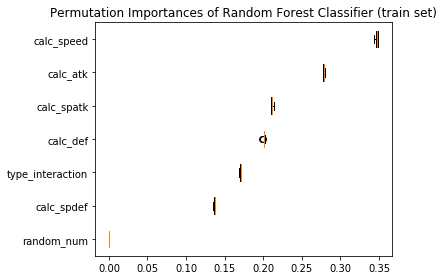

In [13]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=train.columns[sorted_idx])
ax.set_title("Permutation Importances of Random Forest Classifier (train set)")
fig.tight_layout()
plt.show()

### Results
Luckily, all features of the model are more important than the random_num column. The large emphasis on speed is also accurate, since my friends told me that gen6 pokemon had a Speed meta. So Speed is pretty OP, and the model caught that nuance. <br>
I'm happy that the dataset was well-made and comprehensive enough for someone who doesn't play pokemon like myself to train a model that accurately reflects Gen6 battles. <br>

Problem: There is another important matter that my model overlooks, and that is type effectiveness. After spending an entire day feature engineering and adjusting the models, I haven't found a neat way for a model to learn type effectiveness. The speed bias is too strong in every iteration. Must look into this. <br>

Quick Fix: I have run out of ideas with regard to reflecting type effectivity (even aggregated features of both pokemon into difference features) but speed bias is too strong. Perhaps there needs to be more data with slow pokemon beating types they are effective against, or further model tuning. Low-hanging fruits are meant to be eaten, so I decided to decrease the speed of pokemon after training. This makes it so that pokemon battles with type interaction==0 (which the model was able to accurately predict anyway) don't get affected, but battles with type interaction!=0 will be skewed to heavily favor the pokemon with an advantage (as it should in the real world anyway). <br>

Intuitively, I rationalize it like the attack stat. Attack calculates damage per move, and if type effectivity is 0.5, then it does half as much damage per move. Speed affects moves, so if type effectivity is 0.5, then a move is "halved," meaning a pokemon has to act twice as much to do normal damage. Granted, this is a very poor take, but if it works, it works.

In [14]:
# Train model and save pkl
try:
    train.drop("random_num", axis=1, inplace=True)
except Exception as e:
    print("already dropped random_num")
    
rf_final = RandomForestClassifier(**random_cv.best_params_)
rf_final.fit(train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
train

,type_interaction,calc_speed,calc_atk,calc_def,calc_spatk,calc_spdef
0,-1.50,-11,-66,9,-38,30
1,0.00,-27,-7,14,40,30
2,0.00,5,-4,-21,-5,-10
3,-1.50,-15,-116,4,-108,15
4,0.00,5,-6,14,-1,35
...,...,...,...,...,...,...
75057,2.00,-57,168,10,130,10
75058,1.00,-17,55,7,36,-11
75059,2.00,-57,104,-35,126,-35
75060,1.75,-65,177,55,112,35


In [16]:
pokemon['Type 2'].fillna("No Type", inplace=True)

typechart['No Type'] = 1.0
typechart['Normal'] = typechart.Normal.astype('float64')

#add row for no type (why did it take me 15 mins to figure this out when it was this easy)
row = np.ones(19).tolist()
row.insert(0, "No Type")
typechart.loc[len(typechart)] = row

In [20]:
#Takes input of your pokemon (first pokemon) and their pokemon (second pokemon)
def predict_battle(yours, theirs):
    #Gets stats of each pokemon and merges them as first_stats and second_stats
    your_pokemon = pokemon.loc[pokemon.Name == yours].reset_index(drop=True)
    their_pokemon = pokemon.loc[pokemon.Name == theirs].reset_index(drop=True)
    
    your_pokemon = your_pokemon.add_prefix("first_")
    their_pokemon = their_pokemon.add_prefix("second_")
    
    battle = their_pokemon.merge(your_pokemon, left_index=True, right_index=True)
    
    #Performs typechart calculations
    idx = 0
    first_multiplier = typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 2"]].prod()
    second_multiplier = typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 2"]].prod()
        
    battle['type_interaction'] = 0.
    battle['calc_speed'] = 0

    battle.at[idx, 'first_Attack'] = battle.iloc[idx].first_Attack * typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 2"]].prod()
    battle.at[idx, 'first_Sp. Atk'] = battle.iloc[idx]['first_Sp. Atk'] * typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["first_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["first_Type 2"])][battle.iloc[idx]["second_Type 2"]].prod()
    
    battle.at[idx, 'second_Attack'] = battle.iloc[idx].second_Attack * typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 2"]].prod()
    battle.at[idx, 'second_Sp. Atk'] = battle.iloc[idx]['second_Sp. Atk'] * typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 1"]].prod() * typechart.loc[(typechart.Attacking == battle.iloc[idx]["second_Type 1"]) | (typechart.Attacking == battle.iloc[idx]["second_Type 2"])][battle.iloc[idx]["first_Type 2"]].prod()

    battle.at[idx, 'type_interaction'] = second_multiplier - first_multiplier

    if first_multiplier == 0: first_multiplier = 0.0001
    if second_multiplier == 0: second_multiplier = 0.0001
        
    if battle.iloc[idx]['type_interaction'] > 0:
        battle.at[idx, 'first_Speed'] = battle.iloc[idx]['first_Speed'] / second_multiplier
    elif battle.iloc[idx]['type_interaction'] < 0:
        battle.at[idx, 'second_Speed'] = battle.iloc[idx]['second_Speed'] / first_multiplier
        
    battle['calc_speed'] = battle['second_Speed'] - battle['first_Speed']
    battle['calc_atk'] = battle['second_Attack'] - battle['first_Attack']
    battle['calc_def'] = battle['second_Defense'] - battle['first_Defense']
    battle['calc_spatk'] = battle['second_Sp. Atk'] - battle['first_Sp. Atk']
    battle['calc_spdef'] = battle['second_Sp. Def'] - battle['first_Sp. Def']
    
    #Remove useless columns 
    battle.drop(list(battle.filter(regex = 'first_')), axis = 1, inplace = True)
    battle.drop(list(battle.filter(regex = 'second_')), axis = 1, inplace = True)
    
    #Predict using RF model
    pred = rf_final.predict(battle)
    probs = rf_final.predict_proba(battle)
    print(battle)
    
    #If 0, yours wins, else theirs wins
    if pred[0] == 0:
        return "%s (%.2f%% confident)" % (yours, probs[0][0]*100)
    else:
        return "%s (%.2f%% confident)" % (theirs, probs[0][1]*100)

Test case I made from my head because Idk much about pokemon.

In [30]:
print(predict_battle("Charizard", "Blastoise")) #Blastoise
print(predict_battle("Pikachu", "Squirtle")) #Pikachu
print(predict_battle("Bulbasaur", "Totodile")) #Bulbasaur
print(predict_battle("Pikachu", "Onix")) #Onix
print(predict_battle("Squirtle", "Charmander")) #Squirtle
print(predict_battle("Pikachu", "Raichu")) #Raichu
print(predict_battle("Eevee", "Ekans")) #Ekans
print(predict_battle("Blaziken", "Koffing")) #Blaziken
print(predict_battle("Charizard", "Nidoking")) #Charizard
print(predict_battle("Barbaracle", "Scrafty")) #Scrafty
print(predict_battle("Squirtle", "Charizard")) #Most probably Squirtle but Charizard has a chance
print(predict_battle("Bulbasaur", "Blastoise")) #Most probably Bulbasaur but Blastoise has a chance
print(predict_battle("Seadra", "Kadabra")) #No idea who wins here

   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0               1.5          28       124        22         116          20
Blastoise (99.50% confident)
   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0              -1.0         -69       -62        25         -50          14
Pikachu (89.00% confident)
   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0              -1.5         -24       -66        15        -108         -17
Bulbasaur (98.25% confident)
   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0               2.0          25        90       120          60          -5
Onix (85.25% confident)
   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0              -1.5         -11       -70       -22         -70         -14
Squirtle (97.75% confident)
   type_interaction  calc_speed  calc_atk  calc_def  calc_spatk  calc_spdef
0               0.0        

In [19]:
import pickle
pickle.dump(rf_final, open("model/rf_final.pkl", 'wb'))

### Note: pkl file is too large for some reason so I'm gonna gitignore it